# ML Assignment 01 : Histograms, Boxplots, kNN

In [94]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        import math
from numpy import linalg as LA

/kaggle/input/normal/NormalSample.csv
/kaggle/input/fraudknn/Fraud.csv


### Write a Python program to calculate the density estimator of a histogram.  Use the field x in the NormalSample.csv file. 

In [95]:
df = pd.read_csv("/kaggle/input/normal/NormalSample.csv")
df.head(10)

,i,group,x
0,0,1,29.8
1,1,1,33.3
2,2,0,30.9
3,3,1,32.2
4,4,0,31.1
5,5,0,29.3
6,6,1,31.5
7,7,1,31.7
8,8,1,31.4
9,9,1,31.4


In [96]:
#max value of x
df.describe()

,i,group,x
count,1001.000000,1001.000000,1001.000000
mean,500.000000,0.685315,31.414585
std,289.108111,0.464623,1.397672
min,0.000000,0.000000,26.300000
25%,250.000000,0.000000,30.400000
50%,500.000000,1.000000,31.500000
75%,750.000000,1.000000,32.400000
max,1000.000000,1.000000,35.400000


### According to Izenman (1991) method, what is the recommended bin-width for the histogram of x? 

In [97]:
from scipy.stats import iqr
inter_quartile_range = iqr(df.x)
N = df.x.count()
bin_width = 2*inter_quartile_range*(pow(N,-1/3)) #bin width = 2(IQR)N^(-1/3)
print(bin_width)

0.3998667554864774


### What are the minimum and the maximum values of the field x? 

In [98]:
n = len(df.x)
min_x = df.x.min()
max_x = df.x.max()
print("Minimum = ",min_x,"\nMaximum = ",max_x)

Minimum =  26.3 
Maximum =  35.4


### Use h = 2, minimum = a and maximum = b. List the coordinates of the density estimator.  Paste the histogram drawn using Python or your favorite graphing tools. 

In [99]:
#y = [0.4, 0.6, 0.7, 1.9, 2.4, 6.1, 6.2,7.3]
def get_midpoints(dfx,binw):
    x = dfx


    mini = math.floor(x.min())
    maxi = math.ceil(x.max())
    

    binw = binw     #Bin width

    midpoints = mini+binw/2

    no_of_bins = int((maxi-mini)/binw)
    print("Number of bins =",no_of_bins)
    start = mini+binw/2
    midps = [start]

    for i in range(0,no_of_bins-1):
        m = start+binw
        start = m
        midps.append(m)

    middf = pd.DataFrame(midps,columns = {"mi"}) #We get 100 midpoints and store it in a datframe
    return middf    #Midpoints

In [100]:
def density_estimate(midpoint):
    m1 = midpoint
    density = 0
    for i in df.x:
        u = (i-m1)/binw
        if (u>-0.5 and u<=0.5):
            density+=1
    return density/(n*binw)

In [101]:
def answer(df,binwidth):
    x = df.x
    binw = binwidth
    middf = get_midpoints(df.x,binw)
    lis = []
    for m in middf.mi:
        lis.append(density_estimate(m))

    middf["p(mi)"] = np.array(lis)
    #plt.step(middf.mi,middf["p(mi)"])
    return middf

### Use h = 2, minimum = a and maximum = b. List the coordinates of the density estimator.  Paste the histogram drawn using Python or your favorite graphing tools. 

Number of bins = 5


,mi,p(mi)
0,27.0,0.003996
1,29.0,0.084416
2,31.0,0.237263
3,33.0,0.163337
4,35.0,0.010989


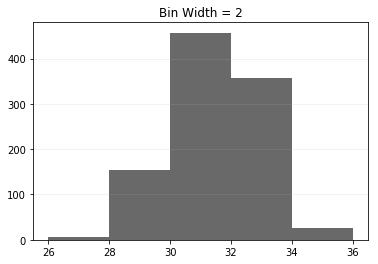

In [102]:
binw = 2
ans_df2 = answer(df,binw)

plt.hist(x=df.x,range=(26,36), bins = 5,color = "dimgray") # h = 2
plt.title("Bin Width = 2")
plt.grid(axis='y', alpha=0.2)
plt.savefig("h2.png")
ans_df2

### Use h = 1, minimum = a and maximum = b. List the coordinates of the density estimator.  Paste the histogram drawn using Python or your favorite graphing tools. 

Number of bins = 10
     mi     p(mi)
0  26.5  0.000999
1  27.5  0.006993
2  28.5  0.041958
3  29.5  0.126873
4  30.5  0.206793
5  31.5  0.267732
6  32.5  0.237762
7  33.5  0.088911
8  34.5  0.019980
9  35.5  0.001998


,mi,p(mi)
0,26.5,0.000999
1,27.5,0.006993
2,28.5,0.041958
3,29.5,0.126873
4,30.5,0.206793
5,31.5,0.267732
6,32.5,0.237762
7,33.5,0.088911
8,34.5,0.019980
9,35.5,0.001998


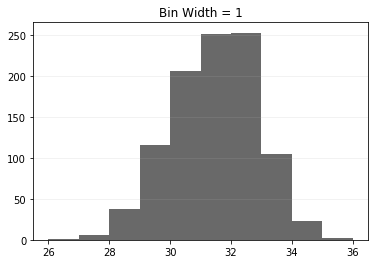

In [103]:
binw = 1
ans_df1 = answer(df,binw)
print(ans_df1)
plt.hist(x=df.x,range=(26,36), bins = 10,color = "dimgray") # h = 1
plt.title("Bin Width = 1")
plt.grid(axis='y', alpha=0.2)
plt.savefig("h1.png")
ans_df1

### Use h = 0.5, minimum = a and maximum = b. List the coordinates of the density estimator.  Paste the histogram drawn using Python or your favorite graphing tools. 

Number of bins = 20
Co-ordinates of density 
        mi     p(mi)
0   26.25  0.001998
1   26.75  0.000000
2   27.25  0.001998
3   27.75  0.011988
4   28.25  0.029970
5   28.75  0.053946
6   29.25  0.103896
7   29.75  0.149850
8   30.25  0.207792
9   30.75  0.205794
10  31.25  0.253746
11  31.75  0.281718
12  32.25  0.255744
13  32.75  0.219780
14  33.25  0.119880
15  33.75  0.057942
16  34.25  0.029970
17  34.75  0.009990
18  35.25  0.003996
19  35.75  0.000000


,mi,p(mi)
0,26.25,0.001998
1,26.75,0.000000
2,27.25,0.001998
3,27.75,0.011988
4,28.25,0.029970
5,28.75,0.053946
6,29.25,0.103896
7,29.75,0.149850
8,30.25,0.207792
9,30.75,0.205794


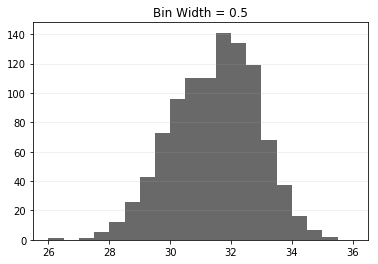

In [104]:
binw = 0.5
ans_df05 = answer (df,binw)
print("Co-ordinates of density \n",ans_df05)
plt.hist(x=df.x,range=(26,36), bins = 20,color = 'dimgray') # h = 0.5
plt.title("Bin Width = 0.5")
plt.grid(axis='y', alpha=0.2)
plt.savefig("h05.png")
ans_df05

### Use h = 0.1, minimum = a and maximum = b. List the coordinates of the density estimator.  Paste the histogram drawn using Python or your favorite graphing tools. 

Number of bins = 100


,mi,p(mi)
0,26.05,0.00000
1,26.15,0.00000
2,26.25,0.00999
3,26.35,0.00000
4,26.45,0.00000
5,26.55,0.00000
6,26.65,0.00000
7,26.75,0.00000
8,26.85,0.00000
9,26.95,0.00000


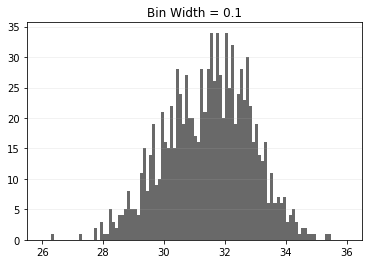

In [105]:
binw = 0.1
ans_df01 = answer (df,binw)
ans_df01
plt.hist(x=df.x,range=(26,36), bins = 100,color = "dimgrey") # h = 2
plt.title("Bin Width = 0.1")
plt.grid(axis='y', alpha=0.2)
plt.savefig("h01.png")
ans_df01

### c)	(5 points) Draw a boxplot of x (without the group) using the Python boxplot function.  Can you tell if the Python’s boxplot has displayed the 1.5 IQR whiskers correctly?

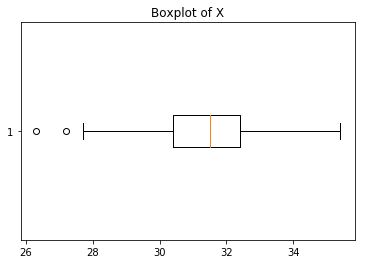

In [148]:
import seaborn as sns
plt.boxplot(df.x,vert = False)
plt.title("Boxplot of X")
plt.savefig("boxplot_x.png")

### Use in the NormalSample.csv to generate box-plots for answering the following questions.

### a)	(5 points) What is the five-number summary of x?  What are the values of the 1.5 IQR whiskers?


In [109]:
from scipy.stats import iqr
inter_quartile_range = iqr(df.x)
q1 = np.percentile(df.x,25)
q3 = np.percentile(df.x,75)
l_whisker = q1 - 1.5*inter_quartile_range
u_whisker = q3 + 1.5*inter_quartile_range
print ("Lower Whisker = ",l_whisker,"\nUpper Whisker = ",u_whisker)

Lower Whisker =  27.4 
Upper Whisker =  35.4


### b)	5 points) What is the five-number summary of x for each category of the group? What are the values of the 1.5 IQR whiskers for each category of the group?

In [112]:
zero = []
ones = []
for i in range(0,df.x.count()):
    if df.group[i] == 0:
        zero.append(df.x[i])
    else:
        ones.append(df.x[i])
zeros = np.array(zero)
ones = np.array(ones)

In [113]:
from scipy.stats import iqr
inter_quartile_range = iqr(zeros)
q1 = np.percentile(zeros,25)
q3 = np.percentile(zeros,75)
l_whisker = q1 - 1.5*inter_quartile_range
u_whisker = q3 + 1.5*inter_quartile_range
print ("Lower Whisker = ",l_whisker,"\nUpper Whisker = ",u_whisker)

Lower Whisker =  27.599999999999994 
Upper Whisker =  32.400000000000006


In [114]:
from scipy.stats import iqr
inter_quartile_range = iqr(ones)
q1 = np.percentile(ones,25)
q3 = np.percentile(ones,75)
l_whisker = q1 - 1.5*inter_quartile_range
u_whisker = q3 + 1.5*inter_quartile_range
print ("Lower Whisker = ",l_whisker,"\nUpper Whisker = ",u_whisker)

Lower Whisker =  29.449999999999992 
Upper Whisker =  34.650000000000006


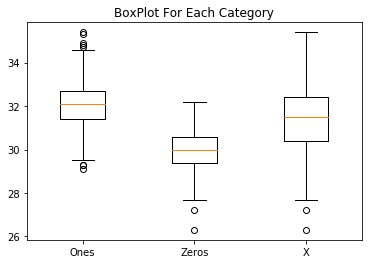

In [115]:
plt.boxplot([ones,zero,df.x],widths = 0.4)
plt.xticks(np.arange(1,4),("Ones","Zeros","X"))
plt.title("BoxPlot For Each Category")
plt.savefig("CategoryBoxplot.png")

In [116]:
df0 = df[df['group']==0]
df0.describe()

,i,group,x
count,315.000000,315.0,315.000000
mean,501.866667,0.0,30.004127
std,287.813171,0.0,0.973935
min,2.000000,0.0,26.300000
25%,260.500000,0.0,29.400000
50%,494.000000,0.0,30.000000
75%,747.000000,0.0,30.600000
max,1000.000000,0.0,32.200000


In [117]:
df1 = df[df['group']==1]
df1.describe()

,i,group,x
count,686.000000,686.0,686.000000
mean,499.142857,1.0,32.062245
std,289.906257,0.0,1.040236
min,0.000000,1.0,29.100000
25%,241.250000,1.0,31.400000
50%,500.500000,1.0,32.100000
75%,754.750000,1.0,32.700000
max,998.000000,1.0,35.400000


In [118]:
fraud_df = pd.read_csv("/kaggle/input/fraudknn/Fraud.csv")

In [119]:
fraud_df.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


### a)	(5 points) What percent of investigations are found to be fraudulent?  Please give your answer up to 4 decimal places.

In [120]:
num_no_frauds = fraud_df.FRAUD.value_counts()[0]
num_of_frauds = fraud_df.FRAUD.value_counts()[1]
count = fraud_df.FRAUD.count()

In [121]:
fraud_percent = num_of_frauds/count*100
print(round(fraud_percent,4))

19.9497


In [122]:
fraud_df.columns

Index(['CASE_ID', 'FRAUD', 'TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',
       'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS'],
      dtype='object')

### b)	(5 points) Use the BOXPLOT function to produce horizontal box-plots.  For each interval variable, one box-plot for the fraudulent observations, and another box-plot for the non-fraudulent observations.  These two box-plots must appear in the same graph for each interval variable.

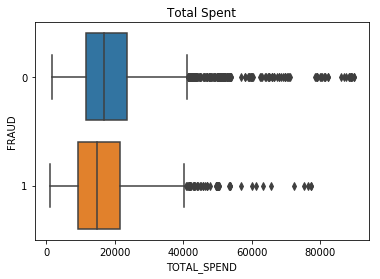

In [123]:
sns.boxplot(data = fraud_df , x = 'TOTAL_SPEND' , y = 'FRAUD',orient = 'h')
plt.title("Total Spent")
plt.savefig("TotalSpent.png")

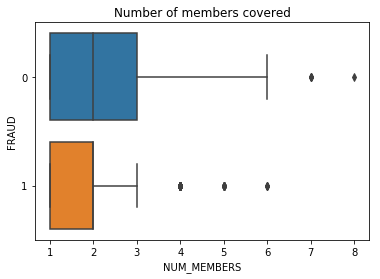

In [124]:
sns.boxplot(data = fraud_df , x = 'NUM_MEMBERS' , y = 'FRAUD',orient = 'h')
plt.title("Number of members covered")
plt.savefig("Num_members.png")

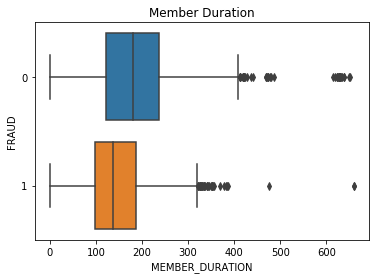

In [125]:
sns.boxplot(data = fraud_df , x = 'MEMBER_DURATION' , y = 'FRAUD', orient = 'h')
plt.title("Member Duration")
plt.savefig("Mem_duration.png")

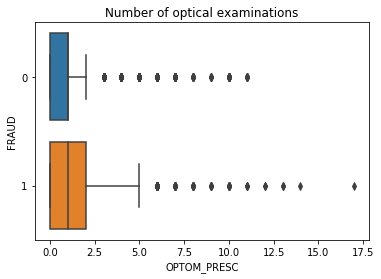

In [126]:
sns.boxplot(data = fraud_df , x = 'OPTOM_PRESC' , y = 'FRAUD' , orient = 'h')
plt.title("Number of optical examinations")
plt.savefig("Optom_Presc.png")

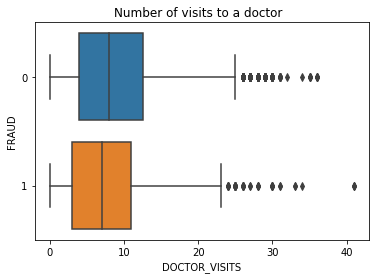

In [127]:
sns.boxplot(data = fraud_df , x = 'DOCTOR_VISITS' , y = 'FRAUD' ,orient = 'h')
plt.title("Number of visits to a doctor  ")
plt.savefig("Doctor_Visit.png")

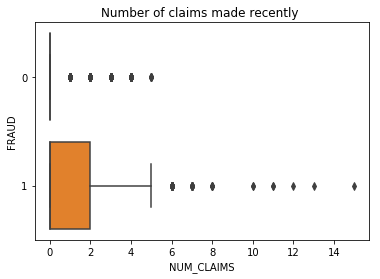

In [128]:
sns.boxplot(data = fraud_df , x = 'NUM_CLAIMS' , y = 'FRAUD',orient = 'h')
plt.title("Number of claims made recently ")
plt.savefig("Num_claims.png")

In [129]:
fraud_df.head()


,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


### c)	(10 points) Orthonormalize interval variables and use the resulting variables for the nearest neighbor analysis. Use only the dimensions whose corresponding eigenvalues are greater than one.
### i.	(5 points) How many dimensions are used?
### ii.	(5 points) Please provide the transformation matrix?  You must provide proof that the resulting variables are actually orthonormal.


In [130]:
fraud_df = pd.read_csv("/kaggle/input/fraudknn/Fraud.csv",usecols=["TOTAL_SPEND","DOCTOR_VISITS","NUM_CLAIMS","MEMBER_DURATION","OPTOM_PRESC","NUM_MEMBERS"])

In [131]:
x = np.matrix(fraud_df)

In [132]:
xtx = x.transpose() * x
print("t(x) * x = \n", xtx)

# Eigenvalue decomposition
evals, evecs = LA.eigh(xtx)
print("Eigenvalues of x = \n", evals)
print("Eigenvectors of x = \n",evecs)

# Here is the transformation matrix
transf = evecs * LA.inv(np.sqrt(np.diagflat(evals)));
print("Transformation Matrix = \n", transf)

# Here is the transformed X
transf_x = x * transf;
print("The Transformed x = \n", transf_x)


t(x) * x = 
 [[2812184770000    1040176400      42913200   20404919400     134771800
      220035900]
 [   1040176400        788159         23809      10264845         57654
         106717]
 [     42913200         23809          7922        448090          3459
           4765]
 [  20404919400      10264845        448090     232422585       1163391
        2121127]
 [    134771800         57654          3459       1163391         24460
          13581]
 [    220035900        106717          4765       2121127         13581
          29423]]
Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]
Eigenvectors of x = 
 [[-5.37750046e-06 -2.20900379e-05  3.62806809e-05 -1.36298664e-04
  -7.26453432e-03  9.99973603e-01]
 [ 6.05433402e-03 -2.69942162e-02  1.27528313e-02  9.99013423e-01
   3.23120126e-02  3.69879256e-04]
 [-9.82198935e-01  1.56454700e-01 -1.03312781e-01  1.14463687e-02
   1.62110700e-03  1.52596881e-05]
 [ 1.59310591

In [133]:
# Check columns of transformed X
xtx = transf_x.transpose() * transf_x;
print("Expect an Identity Matrix = \n", xtx)

# Orthonormalize using the orth function 
import scipy
from scipy import linalg as LA2

orthx = LA2.orth(x)
print("The orthonormalize x = \n", orthx)

# Check columns of the ORTH function
check = orthx.transpose().dot(orthx)
print("Also Expect an Identity Matrix = \n", check)

Expect an Identity Matrix = 
 [[ 1.00000000e+00 -2.87703888e-15  1.90299165e-15  7.06552872e-15
   1.16226473e-15 -1.35308431e-16]
 [-2.87703888e-15  1.00000000e+00 -1.37216627e-15 -1.98244199e-14
  -6.59194921e-16  7.21644966e-16]
 [ 1.90299165e-15 -1.37216627e-15  1.00000000e+00  4.96366728e-15
  -6.24500451e-17 -1.17961196e-16]
 [ 7.06552872e-15 -1.98244199e-14  4.96366728e-15  1.00000000e+00
   1.10432496e-14 -4.20496971e-15]
 [ 1.16226473e-15 -6.59194921e-16 -6.24500451e-17  1.10432496e-14
   1.00000000e+00 -6.66133815e-16]
 [-1.35308431e-16  7.21644966e-16 -1.17961196e-16 -4.20496971e-15
  -6.66133815e-16  1.00000000e+00]]
The orthonormalize x = 
 [[-6.56324665e-04  9.39352141e-03  1.39590283e-02 -6.64664861e-03
   1.02081629e-02 -5.96859502e-03]
 [-7.75702220e-04  1.22658834e-02  5.16174400e-03  8.51930607e-04
   5.01932025e-03  2.09672310e-02]
 [-8.95075830e-04  1.50348109e-02 -1.71350853e-03 -7.38335310e-03
   1.97528525e-02 -7.64597676e-03]
 ...
 [-5.31896971e-02 -4.74021952e

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
target = pd.read_csv("/kaggle/input/fraudknn/Fraud.csv",usecols=["FRAUD"])

### 10 points) Use the NearestNeighbors module to execute the Nearest Neighbors algorithm using exactly five neighbors and the resulting variables you have chosen in c).  The KNeighborsClassifier module has a score function.

### i.	(5 points) Run the score function, provide the function return value
### ii.	(5 points) Explain the meaning of the score function return value.


In [136]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")
knn.fit(transf_x,target)
predictions = knn.predict(transf_x)
print(metrics.accuracy_score(target,predictions))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8778523489932886


### e)	(5 points) For the observation which has these input variable values: TOTAL_SPEND = 7500, DOCTOR_VISITS = 15, NUM_CLAIMS = 3, MEMBER_DURATION = 127, OPTOM_PRESC = 2, and NUM_MEMBERS = 2, find its five neighbors.  Please list their input variable values and the target values. Reminder: transform the input observation using the results in c) before finding the neighbors.

In [137]:
test = [[7500,15,3,127,2,2]] * transf;
test

matrix([[-0.02886529,  0.00853837, -0.01333491,  0.0176811 ,  0.00793805,
          0.0044727 ]])

In [138]:
neighs = knn.kneighbors(test,return_distance=False)
neighs

array([[ 588, 2897, 1199, 1246,  886]])

In [139]:
fraudulent_df = pd.read_csv("/kaggle/input/fraudknn/Fraud.csv")
fraudulent_df.iloc[neighs[0][0:]]

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
588,589,1,7500,15,3,127,2,2
2897,2898,1,16000,18,3,146,3,2
1199,1200,1,10000,16,3,124,2,1
1246,1247,1,10200,13,3,119,2,3
886,887,1,8900,22,3,166,1,2
